In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
from scipy.signal import find_peaks, convolve, medfilt, savgol_filter
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib as mpl
from glob import glob
from copy import copy
from natsort import natsorted
from pandas import DataFrame
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, parent_dir)
import matplotlibcolors
plt.style.use(parent_dir + '/matplotlibrc')


%matplotlib widget

In [6]:
main = {}
dir  = r"C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\sonnet\LT402 Design/"
chip = 'LT402_32x32_4-8GHz'
path = dir + chip + '/'
headers = ['f0', 'f0_pretrim', 'Lc', 'Lc_pretrim', 'Lf', 'Lf_pretrim', 'w']
for header in headers:
    filepath = path + chip + '_' + header + '.npy'
    data = np.load(filepath)
    main[header] = data
kid_id_board = np.load( path + chip + '_id.npy')
flip = 1

In [7]:
# freqs, dark_s21 = np.load('./VNAsweep.npy')
freqs, dark_s21 = np.load('.\S21s_2025820_18h46\S21_dark.npy')
M_pxs = 32
N_pxs = 32
nr = M_pxs * N_pxs

Total:  999
Sufficiently spaced with  100.0 MHz:  989


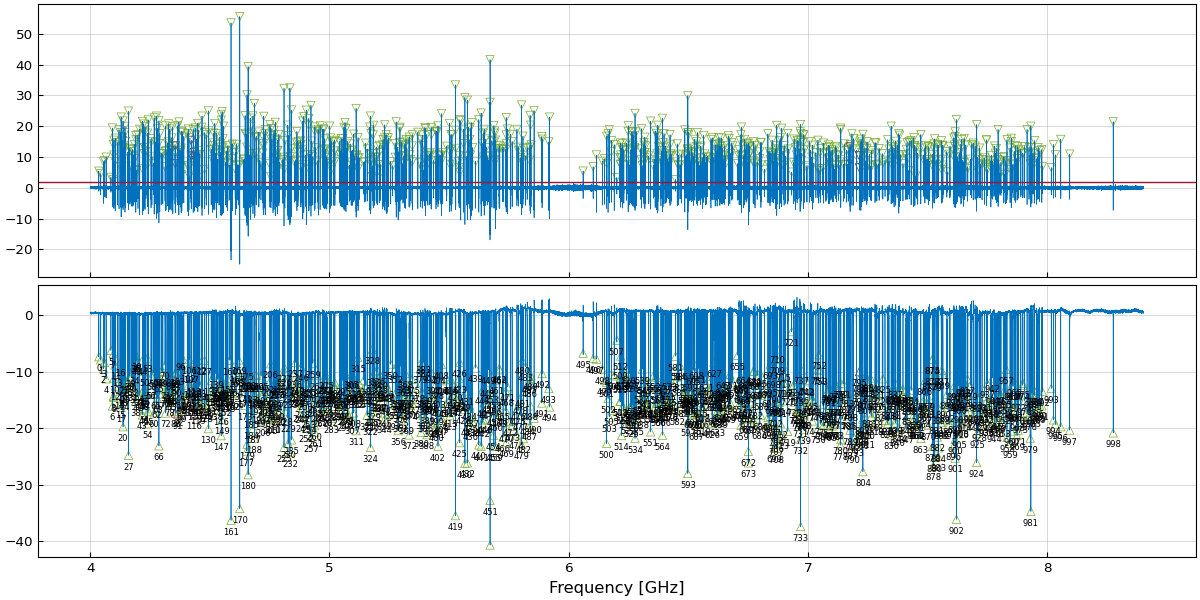

In [29]:
sw = 10 # even number
mph = 2
min_df = .1
window = np.ones(sw)/sw
# smooth_s21 = convolve(dark_s21, window, mode='same')
smooth_s21 = savgol_filter(dark_s21, 5, 4)
ds21 = np.diff(smooth_s21, 1)
# smooth_ds21 = convolve(ds21, window, mode='same')
smooth_ds21 = savgol_filter(ds21, 5, 4)
d2s21 = np.diff(smooth_ds21, 1)

locs, props = find_peaks(d2s21, height=mph, prominence=mph)
heights = props['peak_heights']
locs += 1
# locs[111] += 1
# locs[112] -= 1
f0s = freqs[locs]

df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df*1e-3
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))


s21_mins = smooth_s21[locs]
fig, ax = plt.subplot_mosaic('a;b', sharex=True, figsize=(12, 6), constrained_layout=True)
ax['a'].plot(freqs[2:], d2s21, lw=.5)
ax['b'].plot(freqs, smooth_s21, lw=.5)
ax['a'].axhline(mph, c='r')

ax['a'].scatter(freqs[locs[~too_close_mask]], heights[~too_close_mask], marker='v', c='None', edgecolor='g')
ax['b'].scatter(f0s[~too_close_mask], s21_mins[~too_close_mask], marker='^', c='None', edgecolor='g')
ax['a'].scatter(freqs[locs[too_close_mask]], heights[too_close_mask], marker='v', c='None', edgecolor='r')
ax['b'].scatter(f0s[too_close_mask], s21_mins[too_close_mask], marker='^', c='None', edgecolor='r')
for i, loc in enumerate(locs):
    ax['b'].annotate(f'{i}', (f0s[i], s21_mins[i]-5), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)
ax['b'].set_xlabel('Frequency [GHz]')
print('Total: ', len(locs))
print('Sufficiently spaced with ', min_df*1e3 , 'MHz: ', len(locs[~too_close_mask]))

In [9]:
files = natsorted(glob('.\S21s_2025820_18h46/*_*y0.npy'))[::-1]
print(files)
nr_steps = len(files)
nr_kids = len(locs)
sweeps = np.empty((nr_steps, len(freqs)))
smoothed_sweeps = np.empty((nr_steps, len(freqs)))
s21s = np.empty((nr_steps, nr_kids))
s21s[:] = np.nan
smooth_dark_s21 = convolve(dark_s21, window, mode='same')
s0 = smooth_dark_s21[locs]
for i, file in enumerate(files):
    f, s21 = np.load(file)
    sweeps[i, :] = s21
    smooth_s21 = convolve(s21, window, mode='same')
    smoothed_sweeps[i, :] = smooth_s21
    s21s[i, :]  = smooth_s21[locs] - s0 

['.\\S21s_2025820_18h46\\S21_x32y0.npy', '.\\S21s_2025820_18h46\\S21_x31y0.npy', '.\\S21s_2025820_18h46\\S21_x30y0.npy', '.\\S21s_2025820_18h46\\S21_x29y0.npy', '.\\S21s_2025820_18h46\\S21_x28y0.npy', '.\\S21s_2025820_18h46\\S21_x27y0.npy', '.\\S21s_2025820_18h46\\S21_x26y0.npy', '.\\S21s_2025820_18h46\\S21_x25y0.npy', '.\\S21s_2025820_18h46\\S21_x24y0.npy', '.\\S21s_2025820_18h46\\S21_x23y0.npy', '.\\S21s_2025820_18h46\\S21_x22y0.npy', '.\\S21s_2025820_18h46\\S21_x21y0.npy', '.\\S21s_2025820_18h46\\S21_x20y0.npy', '.\\S21s_2025820_18h46\\S21_x19y0.npy', '.\\S21s_2025820_18h46\\S21_x18y0.npy', '.\\S21s_2025820_18h46\\S21_x17y0.npy', '.\\S21s_2025820_18h46\\S21_x16y0.npy', '.\\S21s_2025820_18h46\\S21_x15y0.npy', '.\\S21s_2025820_18h46\\S21_x14y0.npy', '.\\S21s_2025820_18h46\\S21_x13y0.npy', '.\\S21s_2025820_18h46\\S21_x12y0.npy', '.\\S21s_2025820_18h46\\S21_x11y0.npy', '.\\S21s_2025820_18h46\\S21_x10y0.npy', '.\\S21s_2025820_18h46\\S21_x9y0.npy', '.\\S21s_2025820_18h46\\S21_x8y0.npy', '

Mean prominence:  1.6109802085095946
total:  1000
nr doubles:  25
ID: 27, secprom: 1.2, at: 13
ID: 74, secprom: 1.8, at: 18
ID: 108, secprom: 1.1, at: 6
ID: 179, secprom: 1.0, at: 26
ID: 233, secprom: 1.1, at: 26
ID: 249, secprom: 1.0, at: 1
ID: 280, secprom: 2.3, at: 7
ID: 285, secprom: 1.6, at: 26
ID: 358, secprom: 1.7, at: 19
ID: 421, secprom: 2.4, at: 20
ID: 502, secprom: 1.2, at: 9
ID: 503, secprom: 2.3, at: 9
ID: 533, secprom: 1.3, at: 20
ID: 559, secprom: 1.4, at: 24
ID: 595, secprom: 1.5, at: 30
ID: 616, secprom: 1.6, at: 25
ID: 675, secprom: 1.7, at: 22
ID: 734, secprom: 1.0, at: 21
ID: 735, secprom: 1.8, at: 21
ID: 804, secprom: 1.2, at: 31
ID: 805, secprom: 2.1, at: 10
ID: 902, secprom: 2.3, at: 21
ID: 960, secprom: 1.3, at: 24
ID: 970, secprom: 2.8, at: 8
ID: 982, secprom: 1.5, at: 3
low snr:  0
[]


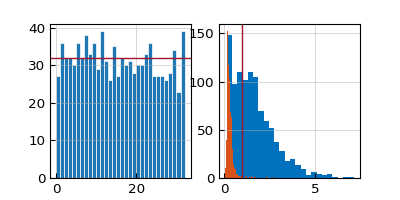

In [13]:
pos = np.empty((nr_kids)) # f0, 
pos[:] = np.nan
f0s_sel = np.empty((nr_kids)) # f0, 
f0s_sel[:] = np.nan
maxproms = []
secproms = []
mpp = 1
spp = 1
doubles = []
shifted = []
bads = []
df = 3e-4
for i in range(nr_kids):
    argsort = np.argsort(s21s[:, i])
    argmax = argsort[-1]
    sec_id = -2
    secargmax = argsort[sec_id]
    while np.abs(secargmax - argmax) == 1:
        sec_id -= 1
        secargmax = argsort[sec_id]
    argmin = argsort[0]
    max = s21s[:, i][argmax]
    secmax = s21s[:, i][secargmax]
    min = s21s[:, i][argmin]
    mean = np.mean(medfilt(s21s[:, i], 3))
    maxprom = max - mean
    secprom =  secmax - mean
    minprom = min - mean
    maxproms.append(maxprom)
    secproms.append(secprom)
    pos[i] = argmax
    f0s_sel[i] = f0s[i]
    if secprom > spp: 
        doubles.append([i, secprom, secargmax])
    # if maxprom > mpp and secprom < spp:
    #     pos[i] = argmax
    #     f0s_sel[i] = f0s[i]
    # elif maxprom > mpp and secprom > spp: 
    #     f0 = f0s[i]
    #     # if f0-f0s[i-1] < df or f0s[i+1]-f0 < df:
    #     #     print('yes')
    #     doubles.append([i, secprom, secargmax])
    # else:
    #     bads.append(i)
# for [idx,row,f0] in doubles[::-1]:
#     pos = np.insert(pos, idx,row)
#     f0s_sel = np.insert(f0s_sel, idx,f0)
print('Mean prominence: ', sum(maxproms)/nr_kids)
fig, ax = plt.subplot_mosaic('ab', figsize=(4,2))
hist = ax['a'].hist(pos, bins=np.arange(nr_steps+1), facecolor='tab:blue', edgecolor='w')
ax['b'].axvline(mpp, c='r')
ax['a'].axhline(M_pxs, c='r')
ax['b'].hist(maxproms, bins='auto')
ax['b'].hist(secproms, bins='auto')
print('total: ', np.sum(~np.isnan(pos)))
print('nr doubles: ', len(doubles))
for double in doubles:
    print('ID: %d, secprom: %.1f, at: %d' % (double[0], double[1], double[2]))
print('low snr: ', len(bads))
print(bads)

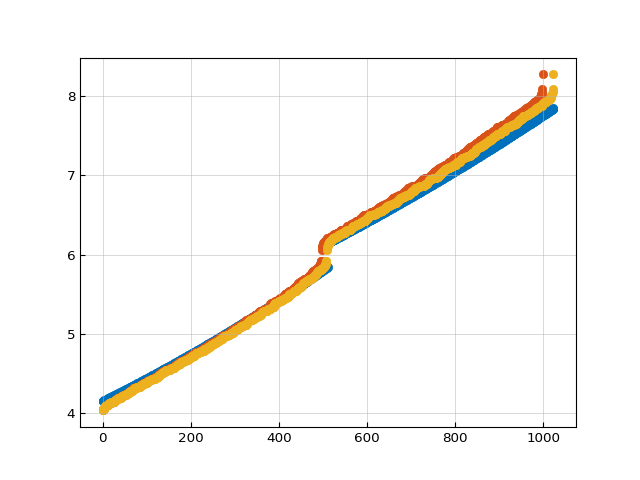

In [14]:
fig, ax = plt.subplots()
ids = np.arange(nr)
ids_m = np.arange(nr_kids)
ids_corr = np.rint(ids_m * nr/nr_kids)
ax.scatter(ids, main['f0'])
ax.scatter(ids_m, f0s_sel)
ax.scatter(ids_corr, f0s_sel)

In [8]:
# add_ids = [724, 694, 632, 564, 553, 441, 417, 407, 362, 322, 260] # should be sorted from high to low
# add_rows = [27,27,4,25,15,17,17,25,14,30,21]
# for i, id in enumerate(add_ids):
#     pos = np.insert(pos, id, add_rows[i], axis=0)
#     f0s = np.insert(f0s, id, f0s[id])
#     locs = np.insert(locs, id, locs[id])
#     s21s = np.insert(s21s, id, s21s[:, id], axis=1)
# nr_kids = len(pos)
# print('total:', nr_kids)

Doubles: [20(17), 245, 691, 732, 992]
No resp : [26, 246] 


1.2713967578125


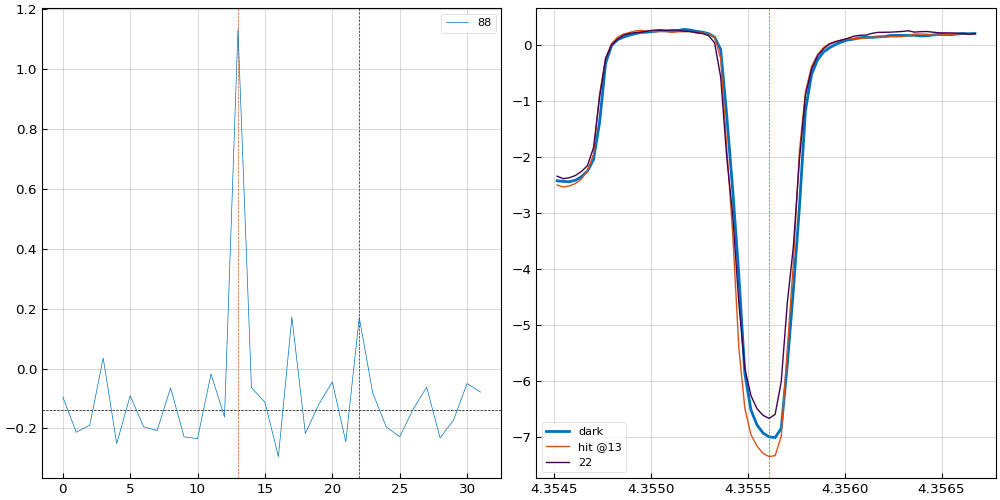

In [30]:
ids = [88]
fig, ax = plt.subplot_mosaic('ba', figsize=(10,5), constrained_layout=True)
start = 0
stop = 20

steps = [22]
bw =  35
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)+1))

for id in ids:
    s21 = s21s[:, id]
    argsort = np.argsort(s21)
    argmax = argsort[-1]
    secargmax = argsort[-2]
    argmin = argsort[0]
    max = s21[argmax]
    secmax = s21[secargmax]
    min = s21[argmin]
    mean = np.mean(medfilt(s21, 3))
    maxprom = max - mean
    secprom =  secmax - mean
    minprom = min - mean
    print(maxprom)
    res = f0s[id]
    loc = locs[id]
    ax['a'].plot(freqs[loc-bw:loc+bw], smooth_dark_s21[loc-bw:loc+bw], lw=2, label='dark')
    ax['a'].axvline(res, c='o', ls='--', lw=.5)
    ax['b'].axhline(mean, ls='--', lw=.5, c='k')

    ax['a'].plot(freqs[loc-bw:loc+bw], smoothed_sweeps[argmax, loc-bw:loc+bw], lw=1, label='hit @' + str(argmax), c='o')
    ax['b'].axvline(argmax, ls='--', lw=.5, c='o')
    for i, step in enumerate(steps):
        ax['a'].plot(freqs[loc-bw:loc+bw], smoothed_sweeps[step, loc-bw:loc+bw], lw=1, label=str(step), c=colors[i])
        ax['b'].axvline(step, ls='--', lw=.5, c=colors[i])
    ax['b'].plot(s21, lw=.5, label=str(id), c='b')
    # ax['b'].plot(medfilt(s21s[:, id], 3), lw=.5, label=str(id), c='r')

ax['b'].legend()
ax['a'].legend()

(26.0, 38.0)

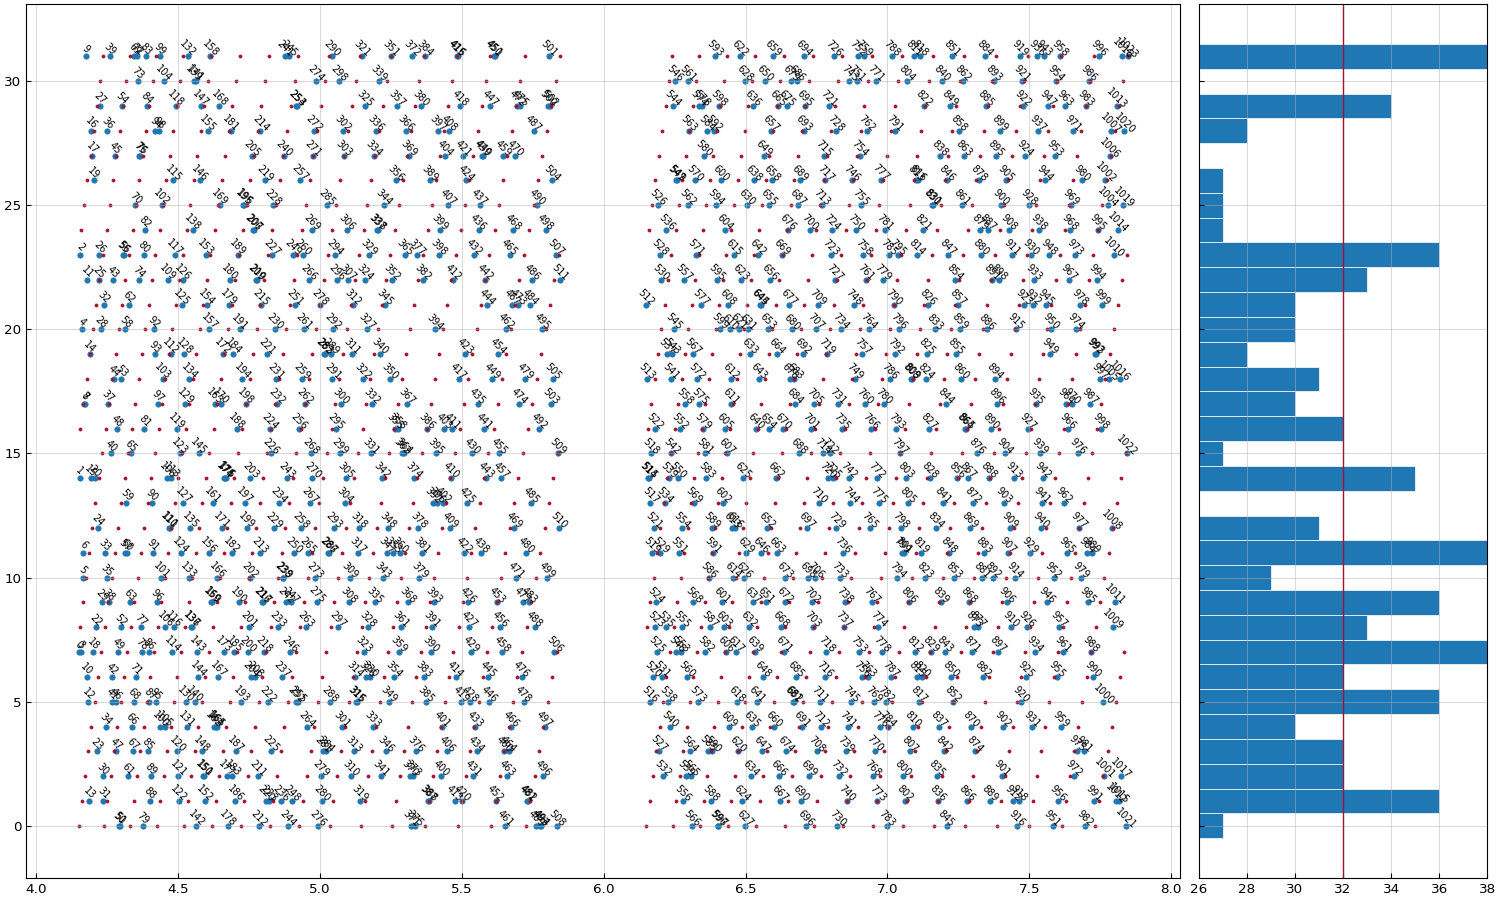

In [16]:
design_map = main['f0'][kid_id_board]
rows_sorted = np.outer(np.arange(M_pxs), np.ones((N_pxs))).flatten()
design_sorted = design_map.flatten()
fig, ax = plt.subplot_mosaic('aaaab', figsize=(15,9), constrained_layout=True, sharey=True)   
cols = ids_corr/M_pxs
ax['a'].scatter(main['f0'][ids_corr.astype(int)], pos, c='tab:blue', s=15)
ax['a'].scatter(design_sorted, rows_sorted, c='r', s=5)
for i, row in enumerate(pos):
    ax['a'].annotate(int(ids_corr[i]), (main['f0'][ids_corr.astype(int)][i], row+.3), fontsize=7, ha='center', va='center', rotation=-45)
    # matrix[]
# ax['a'].set_xticks(np.arange(0, M_pxs, 1))
# ax['a'].set_yticks(np.arange(0, M_pxs, 1))
# ax['a'].grid(True, which='both', linestyle='--', lw=.5)
ax['b'].hist(pos, bins=np.arange(nr_steps+1)-.5, facecolor='tab:blue', edgecolor='w', orientation='horizontal')
ax['b'].axvline(M_pxs, c='r')
ax['b'].set_xlim([26,38])
# ax['a'].set_xlim([30,33])


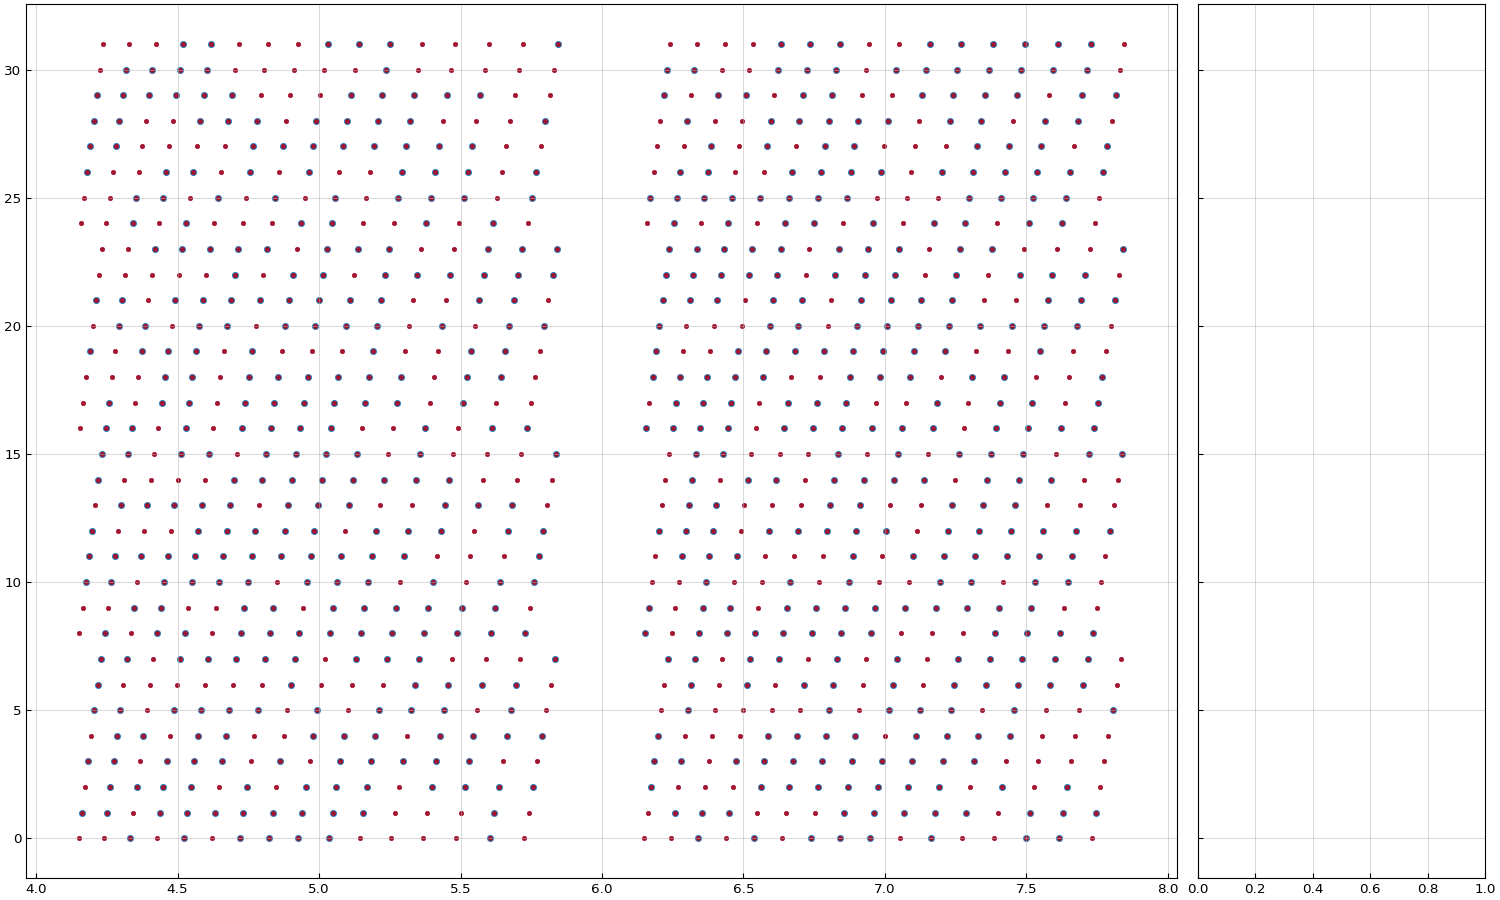

In [17]:
design_map = main['f0'][kid_id_board]
meas_map = np.empty((M_pxs, N_pxs))
meas_map[:] = np.nan
kids_derolled = np.empty((M_pxs, N_pxs))
kids_derolled[:] = np.nan
for i, row in enumerate(pos):
    if ~np.isnan(row):
        row = int(row)
        design_row = design_map[row]
        id_row = kid_id_board[row]
        meas = main['f0'][ids_corr.astype(int)][i]
        col = int(np.argmin(np.absolute(design_row-meas)))
        if np.isnan(meas_map[row, col]):
            meas_map[row, col] = design_row[col]
            kids_derolled[row, col] = i
        else:
            meas_map[row, col] = np.nan
            kids_derolled[row, col] = np.nan


fig, ax = plt.subplot_mosaic('aaaab', figsize=(15,9), constrained_layout=True, sharey=True)  
for i, row in enumerate(design_map):
    ax['a'].scatter(meas_map[i], i*np.ones(len(row)), c='tab:blue', s=20)
    ax['a'].scatter(row, i*np.ones(len(row)), c='r', s=10)

In [ ]:
matrix = np.empty((M_pxs, N_pxs))
matrix[:] = np.nan
for i, row in enumerate(pos):
    if ~np.isnan(row):
        offset = np.amin(kid_id_board[-(int(row)+1)])
        id = ids_corr[i]
        shift = id-offset
        col = np.floor(shift / N_pxs)       
        if col == -1:
            col = 0
        print(i, row, offset, shift, col)
        if np.isnan(matrix[int(row), int(col)]):
            matrix[int(row), int(col)] = i
        else:
            matrix[int(row), int(col)] = np.nan
            print('occupied', i)
# fig, ax = plt.subplot_mosaic('a', figsize=(5,5), constrained_layout=True, sharey=True)   
# ax['a'].imshow(matrix, origin='lower')
# print(np.sum(np.isnan(matrix).flatten()==True))
fig, ax = plt.subplot_mosaic('aaaab', figsize=(15,9), constrained_layout=True, sharey=True)   
for y, row in enumerate(matrix):
    for x, id in enumerate(row):
        if ~np.isnan(id):
            ax['a'].scatter(x, y, c='b')
            ax['a'].annotate(int(id), (x, y+.3), fontsize=8, ha='center', va='center', rotation=-45)
ax['a'].set_xticks(np.arange(0, M_pxs, 1))
ax['a'].set_yticks(np.arange(0, M_pxs, 1))
ax['a'].grid(True, which='both', linestyle='--', lw=.5)
# ax['b'].hist(pos, bins=np.arange(nr_steps+1)-.5, facecolor='tab:blue', edgecolor='w', orientation='horizontal')
# ax['b'].axvline(M_pxs, c='r')
# ax['b'].set_xlim([26,38])
# ax['a'].set_xlim([30,33])
kids_derolled = copy(matrix)

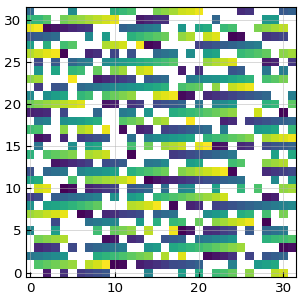

In [18]:
# rows = [[] for _ in range(nr_steps)]
# for id, row in enumerate(pos):
#     if not np.isnan(row):
#         rows[int(row)].append(int(id))
# kids_derolled = np.empty((M_pxs, N_pxs))
# kids_derolled[:] = np.nan   
# for i, row in enumerate(rows):
#     kids_derolled[i, :len(row)] = row
# nans = [[0,0],[0,6], [0,7], [0,16], [0,17],
#         [1,11],[1,13],[1,15],[1,18],[1,21]
#         [2,21],[2,23],
#         [5,19],
#         [6,9],[6,19],
#         [9,8],
#         [10,26],
#         [13,25],
#         [14,31],
#         [17,21],
#         [20,13],
#         [25,29],
#         [27,3],[27,12],
#         [28,20],[28,23],
#         [29,8],[29,30]]
# for i, j in nans:
#     kids_derolled[i, j+1:] = kids_derolled[i, j:-1]
#     kids_derolled[i, j] = np.nan

# kids_derolled = copy(meas_map)
# kids_derolled = np.flip(kids_derolled, axis=0)
fig, ax = plt.subplot_mosaic('a', figsize=(3,3), constrained_layout=True, sharey=True)   
ax['a'].imshow(kids_derolled, cmap='viridis', origin='lower')



998.0
[ nan 723. 755. 783. 816. 846.  nan 896. 934. 991.  13.  30.  nan  86.
 119. 148. 182. 230. 242. 273. 312.  nan  nan  nan 441.  nan  nan 543.
 574. 609.  nan  nan]


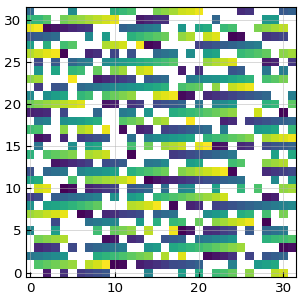

In [19]:
kids = copy(kids_derolled)
print(np.nanmax(kids))
print(kids[1])
# for i, row in enumerate(kids_derolled):
#     kids[i] = np.roll(row, i*10)

fig, ax = plt.subplot_mosaic('a', figsize=(3,3), constrained_layout=True, sharey=True)   
ax['a'].imshow(kids, cmap='viridis', origin='lower')

In [100]:
# row, col = np.argwhere(kids==1)[0]
# kids[row, col-1] = kids[row, col]
# kids[row, col] = np.nan

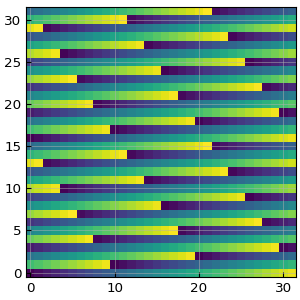

In [20]:
finger_lengths = main['Lf_pretrim']
design_f0s = main['f0_pretrim']
coupler_lengths = main['Lc_pretrim']
fig, ax = plt.subplot_mosaic('a', figsize=(3,3), constrained_layout=True, sharey=True)   
ax['a'].imshow(kid_id_board, cmap='viridis', origin='lower')

In [21]:
main['row'] = np.empty(M_pxs*N_pxs)
main['row'][:] = np.nan
main['col'] = np.empty(M_pxs*N_pxs)
main['col'][:] = np.nan
main['f0_m'] = np.empty(M_pxs*N_pxs)
main['f0_m'][:] = np.nan
for i, row in enumerate(kid_id_board):
    for j, idx in enumerate(row):
        main['row'][idx] = i
        main['col'][idx] = j
        meas_idx = kids[i, j]
        if ~np.isnan(meas_idx):
            meas_f = f0s[int(meas_idx)]
            main['f0_m'][idx] = meas_f
design = main['f0']
meas = main['f0_m']
nanmask = np.isnan(meas)
sort_idx = np.argsort(meas[~nanmask])
inverse_sort_idx = np.argsort(sort_idx)

line
0.006626472392918695


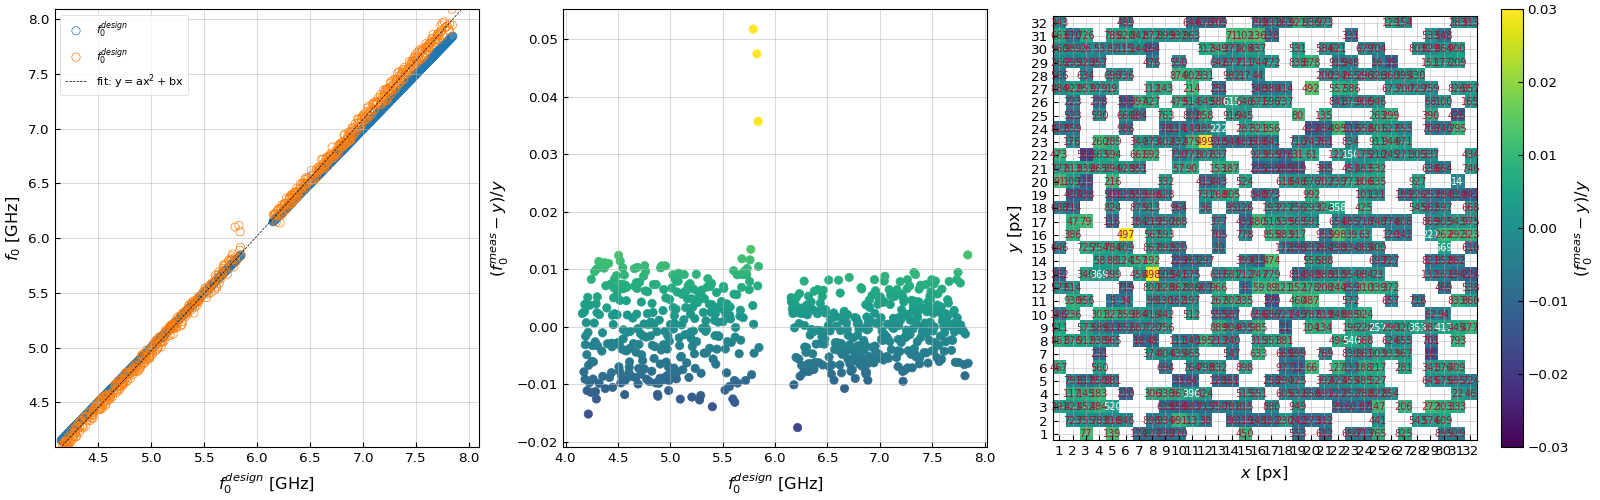

In [22]:
def linear(x, a, b):
    return a*x+b

def secorder(x, a, b, c):
    return a*x**2+b*x + c

line = secorder
size=32
if line:
    if line == linear:
        eq = 'y=ax'
        save = 'fit_linear'
    elif line == secorder:
        eq = 'y=ax^2+bx'
        save = 'fit_secorder'
    print('line')
    popt, pcov = curve_fit(line, design[~nanmask], meas[~nanmask])
    design_fit = line(design, *popt)
    # fit = line(design, *popt)
    flim = np.array([np.nanmin((design, meas)), np.nanmax((design, meas))])
    xfit = np.linspace(flim[0], flim[1])
    yfit = line(xfit, *popt)
    label = 'y'
else:
    design_fit = design
    label = 'f_0^{design}'
    save = 'nofit'
# popt, pcov = curve_fit(line, design[~nanmask], meas[~nanmask])
# design_fit = line(design, *popt)
df_f_fit = (meas - design_fit) / design_fit
df_f_map = df_f_fit[kid_id_board]


fig, ax = plt.subplot_mosaic('abc', figsize=(16, 5), constrained_layout=True)
ax['a'].scatter(design, design, c='None', edgecolor='tab:blue', label='$\it f_0^{design}$')
ax['a'].scatter(design, meas, c='None', edgecolor='tab:orange', label='$\it f_0^{design}$')
if line:
    ax['a'].plot(xfit, yfit, c='k', label='fit: $%s$' % eq, ls='--', lw=0.5)
ax['a'].set_xlabel('$\it f_0^{design}$ $[GHz]$')
ax['a'].set_ylabel('$\it f_0$ $[GHz]$')
ax['a'].set_xlim(flim)
ax['a'].set_ylim(flim)
ax['a'].legend(loc='upper left')
clim = [-.03, .03]
ax['b'].scatter(design, df_f_fit, c=df_f_fit, vmin=clim[0], vmax=clim[1], label='residual, $f_0-y_2$')
# for i, x in enumerate(design):
#     ax['b'].annotate(i, (x, df_f_corr[i]), fontsize=8, ha='center', va='center')
ax['b'].annotate
ax['b'].set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
ax['b'].set_xlabel('$\it f_0^{design}$ $[GHz]$')
im = ax['c'].imshow(df_f_map, cmap='viridis', origin='lower', vmin=clim[0], vmax=clim[1])
for i, x in enumerate(df_f_map):
    for j, y in enumerate(x):
        if ~np.isnan(y):
            old_id = kid_id_board[i, j]
            new_id = kids[i, j]
            if old_id == new_id:
                c = 'w'
            else:
                c = 'r'
            ax['c'].text(j, i, '%d' % new_id, ha='center', va='center', fontsize=7, color=c)
# Major ticks
ax['c'].set_xticks(np.arange(0, size, 1))
ax['c'].set_yticks(np.arange(0, size, 1))
# Labels for major ticks
ax['c'].set_xticklabels(np.arange(1, size+1, 1))
ax['c'].set_yticklabels(np.arange(1, size+1, 1))
# labels
ax['c'].set_xlabel('$\it x$ $[px]$')
ax['c'].set_ylabel('$\it y$ $[px]$')
cbar = fig.colorbar(im, ax=ax['c'])
# cbar.ax.invert_yaxis()
_ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
# _ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))
print(np.std(df_f_fit[~nanmask]))
# fig, ax = plt.subplots()
# ax.scatter(pos[:, -1], df_f_corr[np.argsort(meas)])

In [23]:
print(np.nanstd(df_f_fit[np.abs(df_f_fit)<0.015]))

0.005809772904910301


In [ ]:
fig, ax = plt.subplot_mosaic('c', figsize=(8,8), constrained_layout=True)
im = ax['c'].imshow(df_f_map, cmap='viridis', origin='lower', vmin=clim[0], vmax=clim[1])
for i, x in enumerate(df_f_map):
    for j, y in enumerate(x):
        if ~np.isnan(y):
            old_id = kid_id_board[i, j]
            new_id = kids[i, j]
            if old_id == new_id:
                c = 'w'
            else:
                c = 'r'
            ax['c'].text(j, i, '%d' % new_id, ha='center', va='center', fontsize=7, color=c)
# Major ticks
ax['c'].set_xticks(np.arange(0, size, 1))
ax['c'].set_yticks(np.arange(0, size, 1))
# Labels for major ticks
ax['c'].set_xticklabels(np.arange(1, size+1, 1))
ax['c'].set_yticklabels(np.arange(1, size+1, 1))
# labels
ax['c'].set_xlabel('$\it x$ $[px]$')
ax['c'].set_ylabel('$\it y$ $[px]$')
cbar = fig.colorbar(im, ax=ax['c'])
# cbar.ax.invert_yaxis()
_ = cbar.ax.set_ylabel('$\it (f_0^{meas}-%s)/%s$' % (label, label))

In [ ]:
fig, ax = plt.subplots()
_ = ax.hist(df_f_fit, bins=30)

In [16]:
nr_scans = s21s.shape[0]

def map():
    maps = np.zeros((M_pxs, N_pxs, nr_scans))
    for nr in range(nr_scans):
        for i, m in enumerate(kids):
            for j, k in enumerate(m):
                if ~np.isnan(k):
                    k = int(k)
                    s21s[:, k] -= np.amin(s21s[:, k])
                    s21s[:, k] /= np.amax(s21s[:, k])
                    maps[i, j, nr] = s21s[nr, int(k)]
                else:
                    maps[i, j, nr] = np.nan

    return maps

maps = map()

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(maps[:, :, 2], origin='lower', cmap='viridis')
for i, x in enumerate(df_f_map):
    for j, y in enumerate(x):
            if ~np.isnan(y):
                new_id = kids[i, j]
                ax.text(j, i, '%d' % new_id, ha='center', va='center', fontsize=7, color='r')
_ =ax.set_xticks(np.arange(0, size, 1))
_ =ax.set_yticks(np.arange(0, size, 1))
# Labels for major ticks
_ =ax.set_xticklabels(np.arange(1, size+1, 1))
_ =ax.set_yticklabels(np.arange(1, size+1, 1))

In [18]:
# import matplotlib.animation as animation

# fig, ax = plt.subplots(figsize=(8,8))
# cax = ax.imshow(maps[:, :, 0], origin='lower', cmap='viridis')
# for i, x in enumerate(df_f_map):
#     for j, y in enumerate(x):
#             if ~np.isnan(y):
#                 new_id = kids[i, j]
#                 ax.text(j, i, '%d' % new_id, ha='center', va='center', fontsize=7, color='r')
# ax.set_xticks(np.arange(0, size, 1))
# ax.set_yticks(np.arange(0, size, 1))
# # Labels for major ticks
# ax.set_xticklabels(np.arange(1, size+1, 1))
# ax.set_yticklabels(np.arange(1, size+1, 1))

# def update(frame):
#     cax.set_array(maps[:, :, frame])
#     return cax,
# ani = animation.FuncAnimation(fig, update, frames=nr_scans, interval=200, blit=True)
# plt.show()
# ani.save('animation_chip9.gif', writer='Pillow')


In [19]:
def rel_freqs(f0, oct, Q, nr_kids):
    Q_spacing = Q*(2**(oct/nr_kids)-1)
    powers = np.arange(nr_kids)
    f0s = f0 * (1+Q_spacing/Q)**powers
    return f0s

def rel_freqs(f0, fN, nr_kids):
    oct = np.log2(fN/f0)
    gamma = 2**(oct/nr_kids)
    powers = np.arange(nr_kids)
    f0s = f0 * gamma**powers
    return f0s

def lin_freqs(f0, fN, nr_kids):
    return np.linspace(f0, fN, nr_kids, endpoint=True)

def line(x, a, b):
    return a*x+b


In [ ]:
fig, ax = plt.subplots()
sorted_fs = meas[~nanmask][sort_idx]
ids = np.arange(len(meas))[~nanmask]
df = 0.003
nr_kids = len(sorted_fs)
nr_lower = 504
nr_upper = nr_kids - nr_lower
ax.scatter(ids, sorted_fs, label='measured (sorted)')
popt, pcov = curve_fit(line, ids[:nr_lower], sorted_fs[:nr_lower])
plot_ids_lower = np.arange(np.amax(ids[:nr_lower])+1)
ax.plot(plot_ids_lower, line(plot_ids_lower, *popt), label='fit lower')  
a_l, b_l = popt[0], popt[1]
popt, pcov = curve_fit(line, ids[nr_lower:], sorted_fs[nr_lower:])
plot_ids_upper = np.arange(np.amax(plot_ids_lower)+1, np.amax(ids)+1)
ax.plot(plot_ids_upper, line(plot_ids_upper, *popt), label='fit upper')  
a_u, b_u = popt[0], popt[1]
a = (a_l+a_u)/2+0.000075
nibble_lower = line(ids[:nr_lower], a, b_l)
diff_lower = sorted_fs[:nr_lower] - nibble_lower
argmax_diff_lower = np.argmax(sorted_fs[:nr_lower] - nibble_lower)
max_diff_lower = diff_lower[argmax_diff_lower]
nibble_lower += max_diff_lower + df
ax.scatter(ids[:nr_lower], nibble_lower, label='nibble lower')
nibble_upper = line(ids[nr_lower:], a, b_l)
diff_upper = sorted_fs[nr_lower:] - nibble_upper
argmax_diff_upper = np.argmax(sorted_fs[nr_lower:] - nibble_upper)
max_diff_upper = diff_upper[argmax_diff_upper]
nibble_upper += max_diff_upper + df
ax.scatter(ids[nr_lower:], nibble_upper, label='nibble upper')
ax.legend()

nibble_freqs = np.hstack((nibble_lower, nibble_upper))[inverse_sort_idx]
master_array[:, 7][~nanmask] = nibble_freqs

In [ ]:
fingers = master_array[:, 3]
ids  = master_array[:, 0]
trim_design = master_array[:, 7]

fig, axes = plt.subplot_mosaic('abcde', figsize=(15,3), constrained_layout=True)
ax = axes['a']
ax.scatter(design, fingers, label='design f')
ax.scatter(meas, fingers, label='meas f')
ax.scatter(trim_design, fingers, label='nibble f')
ax.set_ylabel('finger length [um]')
ax.set_xlabel('frequency [GHz]')

def poly(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3+d*x**2+e*x+f

popt, pcov = curve_fit(poly, meas[~nanmask], fingers[~nanmask])
fit_fingers = poly(meas, *popt)   
ax.plot(meas, fit_fingers, c='k', lw=1)	
new_fingers = poly(trim_design, *popt)
nibble_fingers = new_fingers+(fingers-fit_fingers)
# trims = copy(meas)
trims = nibble_fingers - fingers
ax.scatter(trim_design, nibble_fingers, c='r', lw=1, label='nibble f+trim')
ax.legend()

ax = axes['b']
ax.scatter(ids, trims)
ax.set_ylabel('kids')
ax.set_xlabel('f0 [GHz]')
print('minimum trim = %.3f um' % np.nanmax(trims))
print('maximum trim = %.3f um' % np.nanmin(trims))

ax = axes['c']
ax.scatter(design, design, label='original design')
ax.scatter(design, meas, label='measured')
ax.scatter(design, trim_design, label='nibble design')
ax.set_ylabel('freqency [GHz]')
ax.set_xlabel('design frequency [GHz]')
ax.legend()
ax = axes['d']
df = (trim_design[~nanmask][sort_idx][1:]-trim_design[~nanmask][sort_idx][:-1])*1e3
ax.plot(df)
ax.set_ylabel('Spacing df [GHz]')
ax.set_xlabel('kids')
ax = axes['e']
ax.imshow(trims[kid_id_board], origin='lower')

master_array[:, 8] = nibble_fingers

In [ ]:
trims = (master_array[:, 3] - master_array[:, 8])[kid_id_board]
trims[-6,0]


In [34]:
trims = master_array[:, 3] - master_array[:, 8]
np.save('LT361_chip8_trims.npy', trims[kid_id_board])
np.save('LT361_chip8_new_fingers.npy', master_array[:, 8])
np.save('LT361_chip8_master.npy', master_array)

In [34]:
N_fingers = 13 # number of IDC fingers
nr_fingers_cut = 7
finger_length = 111.# full length of the fingers

In [ ]:
nr_fingers = 7
finger_length = 111
max_cut = 104
original_fingers= master_array[:, 3]
nibbled_fingers = master_array[:, 8]
original_cut = nr_fingers*finger_length - original_fingers
nibbled_cut = nr_fingers*finger_length - nibbled_fingers
nibble_two_fingers = ((original_cut // max_cut) != (nibbled_cut // max_cut)).astype(float)
nibble_two_fingers[nanmask] = np.nan
too_little_room_at_start_finger = (nibbled_cut % max_cut < np.nanmax(trims)).astype(float)
too_little_room_at_start_finger[nanmask] = np.nan
both = ((nibble_two_fingers==1)!=(too_little_room_at_start_finger==0))
fig, ax = plt.subplot_mosaic('ab', figsize=(8,4))
ax['a'].imshow((too_little_room_at_start_finger)[kid_id_board], origin='lower')
ax['b'].imshow((nibble_two_fingers)[kid_id_board], origin='lower')

In [ ]:
kid = kid_id_board[31,0]
print('old finger cut: ', 777-original_fingers[kid], (777-original_fingers[kid])//max_cut, ' fingers', (777-original_fingers[kid])%max_cut, ' rem')
print('new finger cut: ', 777-nibbled_fingers[kid],(777-nibbled_fingers[kid])//max_cut, ' fingers', (777-nibbled_fingers[kid])%max_cut, ' rem')
print('trimmed length: ', trims[kid])

In [ ]:
nibbled_fingers[too_little_room_at_start_finger.astype(bool)]

In [ ]:
old = master_array[:, 3]
new = master_array[:, 8]
nr_fingers = 7
finger_length = 111
max_cut = 104
trim_width = 4.5
min_trim = 13

for i, nl in enumerate(new):
    if np.isnan(nl):
        nl = nr_fingers*max_cut
    ol = old[i]
    of = ol // max_cut
    nf = nl // max_cut
    rem = nl - nf*max_cut
    if of != nf:
        print('two')
        # place symbol min_trim (x=of, y=max_cut-trim_min)
    if rem < min_trim:
        print(rem)
        # make symbol rem
        # place symbol rem+dy (x=nf, y=-dy)
    else:
        print(rem)
        # place symbol min_trim (x=nf, y=rem-min_trim)
        


    